<center> <h1> Online Shopper's Intention </h1> </Center>

<h2>Dataset Feature Definations:</h2>

<ul>
<li> Administrative, Informational, and ProductRelated are the type of pages visited by a user in a perticular session. </li> 
<li> Administrative_Duration, Informational_Duration, and ProductRelated_Duration are the durations(in SECONDS) spent by each user in a psarticular session. </li>
<li> Bounce Rate is the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the server during that session. The "BounceRates" feature indicates the average value of Bounce Rate for the pages visited by user. </li>
<li> Exit Rate indicates how often visitors exit from it after visiting any number of pages on the site; as a percentage, exit rate is calculated as the number of exits / number of pageviews for a particular page. "ExitRates" feature indicates average exit rate value of the pages visited by the user.</li>
<li> Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).</li>
<li>SpecialDay feature tells closesness(0 to 1, i.e, 0 is the special D-day) to any special day (Christmas, Valentine's Day, etc) the user visited.
<li>OperatingSystem feature indicates OS of user. </li>
<li>Browser feature tells Browser used by the visitor.</li>
<li>Region feature indicates user's geographic region </li>
<li>TrafficType feature indicates traffic source, i.e, Whatsapp, Google Ads, Facebook Ads, etc of the user.</li>
<li>Weekend feature tells if it was weekend when the user visited.</li>
<li>Revenue feature tells if user purchases or made transaction in a particular session. </li>
<ul>

<h5> What’s the difference between exit rate and bounce rate ?</h5>
As metrics, exits and exit rate report on the action of a visitor leaving a page. Two other GA metrics, bounces and bounce rate, also report on people leaving—but only do so in a specific scenario, which we show you below. 

First, a reminder: exits are recorded when people leave a page; the page’s exit rate indicates how often visitors exited from it after visiting any number of other pages on the site in the same session.  

For example, if people visit the Hotjar homepage → the blog → a specific blog post and leave from it, the exit is counted on the blog post. The blog post’s exit rate is then calculated as number of exits / number of pageviews to the page.<br><br>
<center><img src="google-analytics-exit-flow.png" alt="google-analytics-exit-flow"></center>

<br><br>Unlike exits, bounces measure the percentage of visitors who, after landing on a page, leave it without taking any further action (such as clicking a link or navigating to a second page). 

For example, a visitor who lands directly on the blog post, reads it, and leaves counts as a bounce. Bounce rate for the page is then calculated as the percentage of all sessions that started and ended on the page / all sessions that started on the page and continued towards more pages.<br><br>

<center><img src="google-analytics-bounce-flow.png" alt="google-analytics-bounce-flow" width="300" height="150"></center> <br><br>
Technically speaking, the bounce from the blog post is also an exit, in that the visitor did leave the website; but because the visitor exited on the same page they entered from without going anywhere else, it gets recorded as a bounce.

Another way of saying it: all bounces are exits, not all exits are bounces.


<h3> Revenue is the Target feature here ! </h3>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns

In [2]:
df1 = pd.read_csv("online_shoppers_intention.csv")
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df1.shape

(12330, 18)

Thus, there are 12330 customer sessions and 18 parameters on which each sessiones is being judged.

<h3> Data Types </h3>

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<h3> Basic Stats </h3>

In [5]:
df1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
print(df1.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


<h4> Conclusion </h4>
<ul>
<li> No Null Values </li>
<li> 10 Numerical Variables or Features </li>
<li> 8 Categorical Variables or Features </li>
</ul>

<h3> Univariate Analysis</h3>


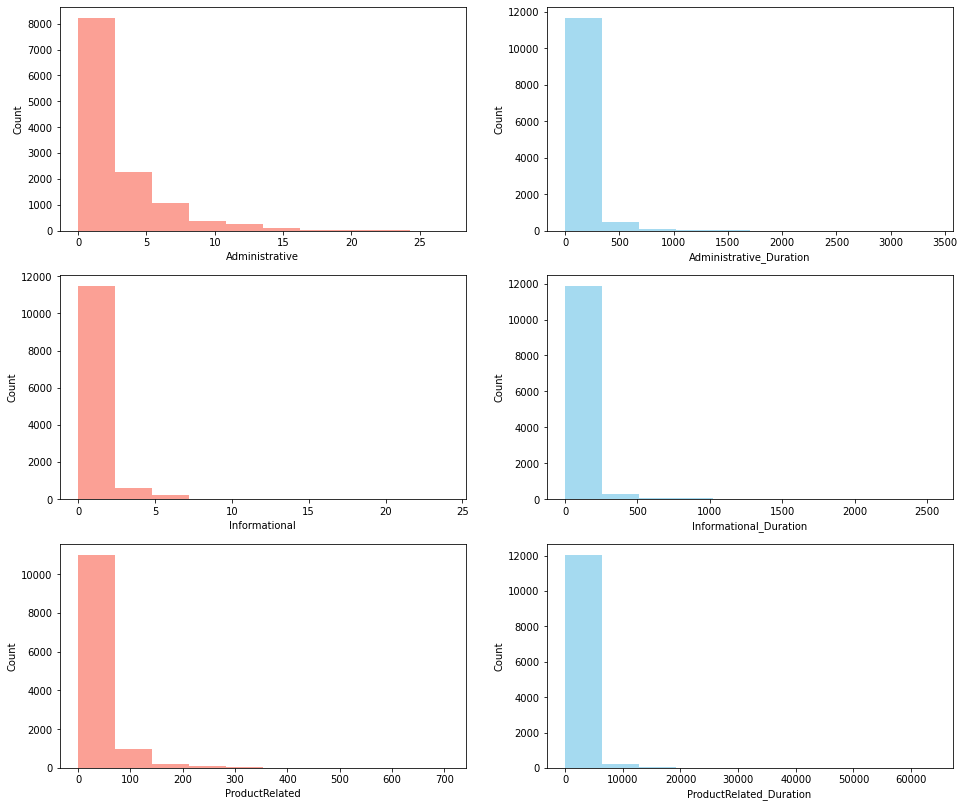

In [7]:
# Plotting histogram of the Administrative and Administrative_Duration columns
matplotlib.rcParams["figure.figsize"] = (16,14)
plt.subplot(3,2,1)
sns.histplot(df1['Administrative'],bins=10, color="salmon", linewidth=0)

plt.subplot(3,2,2)
sns.histplot(df1['Administrative_Duration'],bins=10, kde=False, color="skyblue", linewidth=0)

# Plotting histogram of the Informational and Informational_Duration columns

plt.subplot(3,2,3)
sns.histplot(df1['Informational'],bins=10, kde=False, color="salmon", linewidth=0)

plt.subplot(3,2,4)
sns.histplot(df1['Informational_Duration'],bins=10, kde=False, color="skyblue", linewidth=0)

# Plotting histogram of the ProductRelated and ProductRelated_Duration columns

plt.subplot(3,2,5)
sns.histplot(df1['ProductRelated'],bins=10, kde=False, color="salmon", linewidth=0)

plt.subplot(3,2,6)
sns.histplot(df1['ProductRelated_Duration'],bins=10, kde=False, color="skyblue", linewidth=0)




# Show the plot
plt.show()

<h4> Conclusion </h4>
<ul>
<li>All 3 type pages viewed and time spent on them are haveing <u>RIGHT-SKEWED DISTRIBUTION</u></li>
<li> Have lot of outliers
</ul>

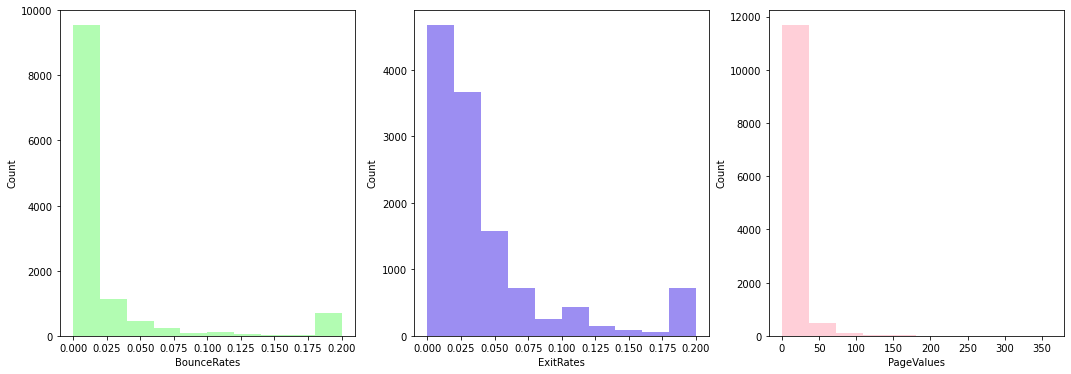

In [8]:
matplotlib.rcParams["figure.figsize"] = (18,6)
plt.subplot(1,3,1)
sns.histplot(df1['BounceRates'],bins=10, color="palegreen", linewidth=0)

plt.subplot(1,3,2)
sns.histplot(df1['ExitRates'],bins=10, color="mediumslateblue", linewidth=0)

plt.subplot(1,3,3)
sns.histplot(df1['PageValues'],bins=10, color="pink", linewidth=0)

plt.show()


<h4> Conclusion </h4>
<ul>
<li>Right Skewed Histogram </li>
<li> Outliers present</li>
<li> Both avg. BounceRates and avg. ExitRates are less which is good for the website and Revenue </li>
<li> Exit rates more, as all exit are bounces but not all bounces are exits</li>
<li> PageValues have avg. value of 5 </li>


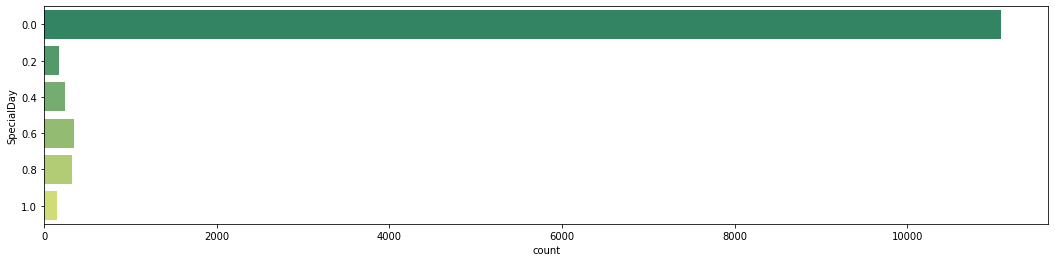

In [9]:
matplotlib.rcParams["figure.figsize"] = (18,4)
sns.countplot(data = df1, y = "SpecialDay", palette="summer")
plt.show()

<h4> Conclusion </h4>
<ul>
<li>More than 90% users visit on special days </li>
</ul>

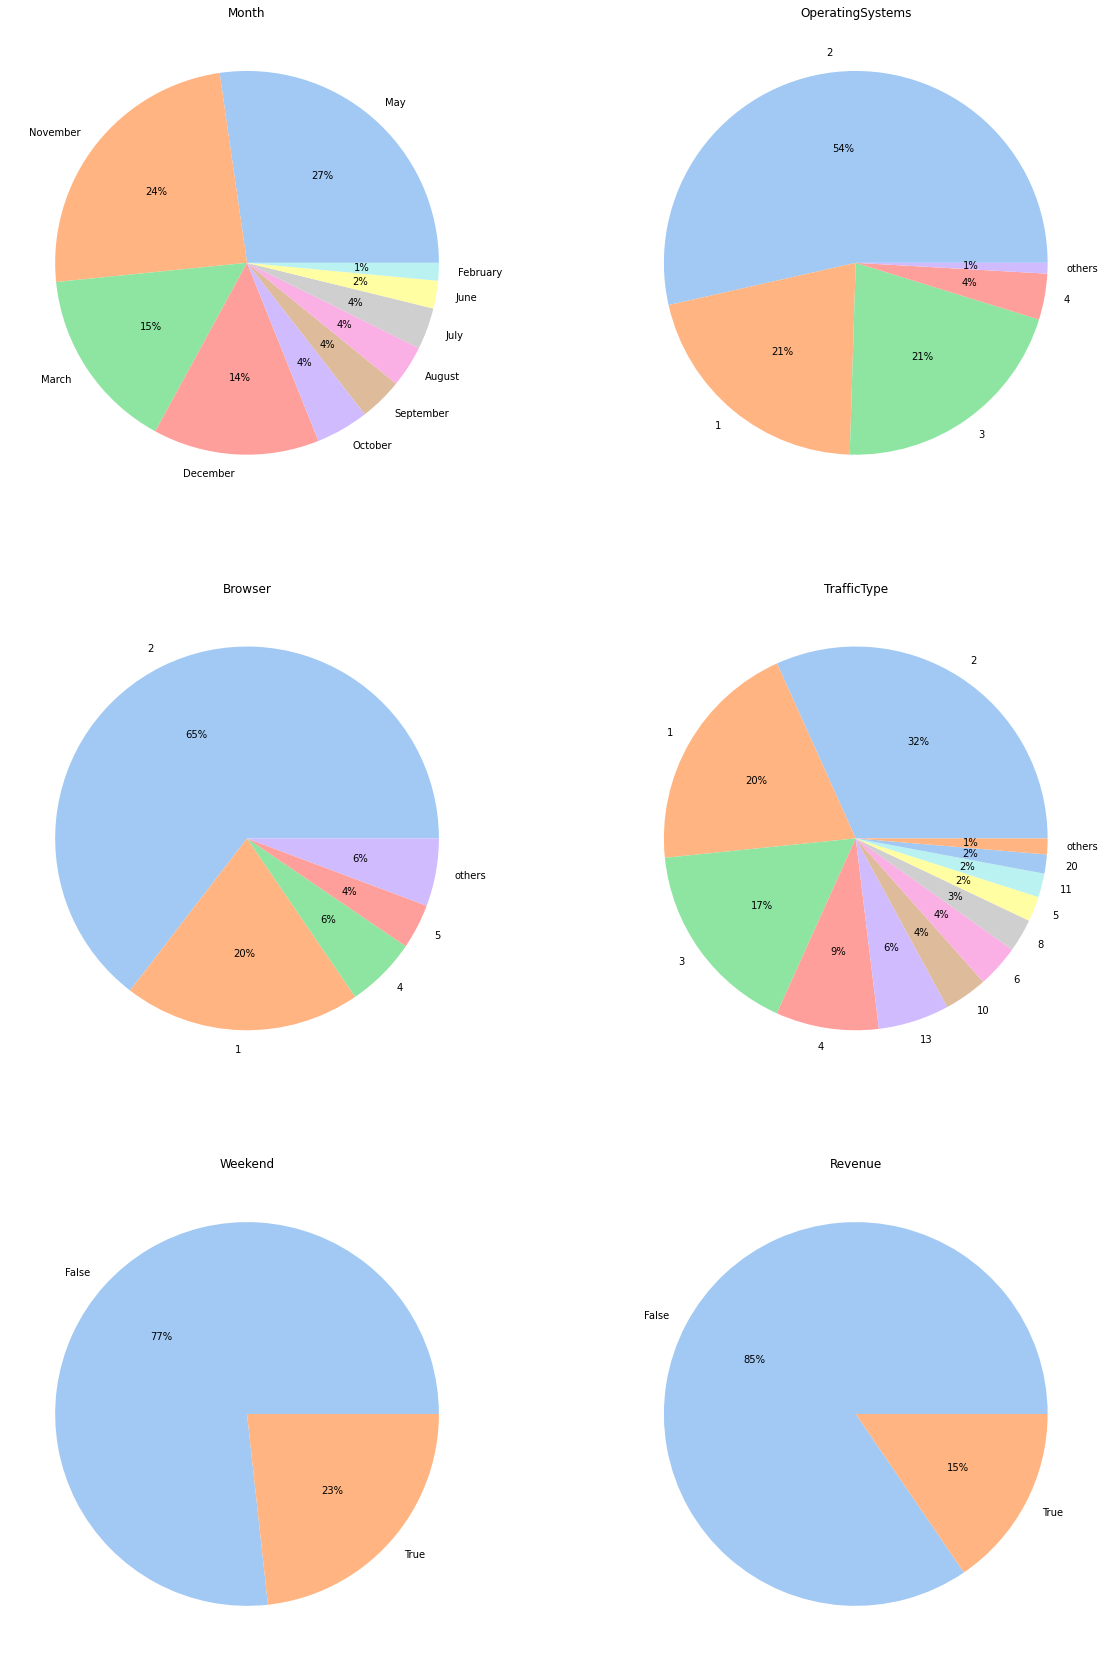

In [10]:
matplotlib.rcParams["figure.figsize"] = (20,30)
plt.subplot(3,2,1)
#define Seaborn color palette to use
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
colors = sns.color_palette('pastel')[0:10]
plt.pie(df1['Month'].value_counts(),labels=labels, autopct='%.0f%%', colors=colors)
plt.title("Month")

plt.subplot(3,2,2)
#define Seaborn color palette to use
data = [6601, 2585, 2555, 478, 111]
labels = "2", "1","3","4","others"
colors = sns.color_palette('pastel')[0:10]
plt.pie(data,labels= labels, autopct='%.0f%%', colors=colors)
plt.title("OperatingSystems")

plt.subplot(3,2,3)
data1 = [7961, 2462, 736, 467, 704]
labels1 = "2", "1","4","5", "others"
plt.pie(data1,labels=labels1, autopct='%.0f%%', colors=colors)
plt.title("Browser")

plt.subplot(3,2,4)
data2 = [3913, 2451, 2052, 1069, 738, 450, 444, 343, 260, 247, 198, 165]
labels2 = "2", "1","3","4","13","10","6","8","5","11","20", "others"
plt.pie(data2,labels=labels2, autopct='%.0f%%', colors=colors)
plt.title("TrafficType")

plt.subplot(3,2,5)
plt.pie(df1['Weekend'].value_counts(),labels=df1['Weekend'].unique(), autopct='%.0f%%', colors=colors)
plt.title("Weekend")

plt.subplot(3,2,6)
plt.pie(df1['Revenue'].value_counts(),labels=df1['Revenue'].unique(), autopct='%.0f%%', colors=colors)
plt.title("Revenue")

plt.show()

<h4> Conclusion </h4>
<ol>
<li>May and November comprises about 51% of user visits. March and december have around 30% user visits and others have the rest. Thus, March, May, November, December have majority users.  </li>
<li>54% users use OS 2 and 1 & 3 is used by 21% each. Thus 3 OS have majority.</li>
<li> 65% users have Type2 browser followed by 20% Type1 browser.Thus Type 1&2 have majority.</li>
<li> Majority of users come from 1,2,3,4 & 13 TrafficType </li>
<li> About 77% users visit on weekdays</li>
<li> About 15% users purchase someting on the website</li>
</ol>

<h3>Bivariate Analysis</h3>

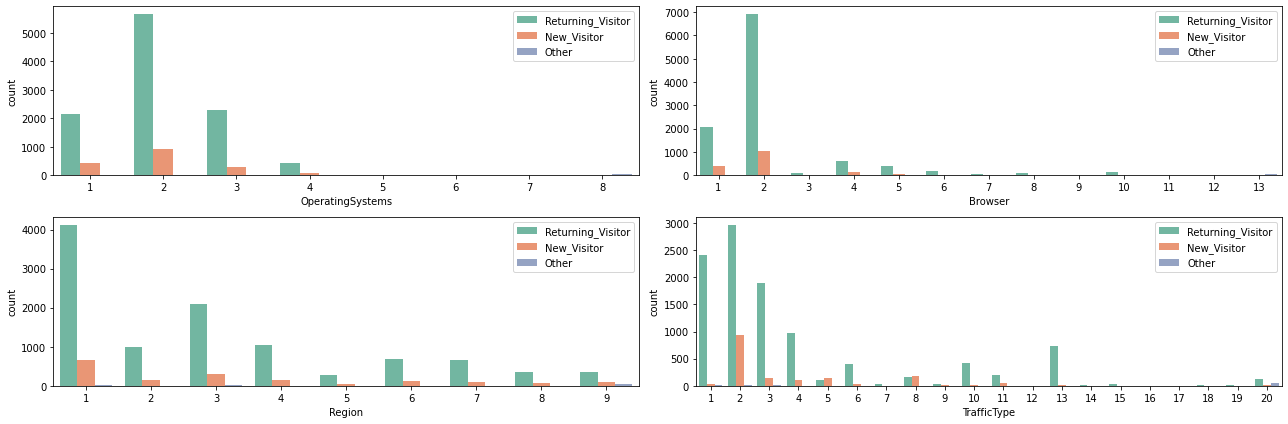

In [11]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df1, x='OperatingSystems', hue='VisitorType', ax=ax1, palette='Set2')
sns.countplot(data=df1, x='Browser', hue='VisitorType', ax=ax2, palette='Set2')
sns.countplot(data=df1, x='Region', hue='VisitorType', ax=ax3, palette='Set2')
sns.countplot(data=df1, x='TrafficType', hue='VisitorType', ax=ax4, palette='Set2')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

<h4> Conclusion </h4>
<ol>
<li> users with OS-2 have maximum return rate followed br OS-3 and OS-1.  </li>
<li>Type2 Browser is used by majority followed by Type1.</li>
<li>Mostly Returning users come from 1 & 3 region.</li>
<li> Majority of users come from 1,2,3,4 & 13 TrafficType. </li>
</ol>

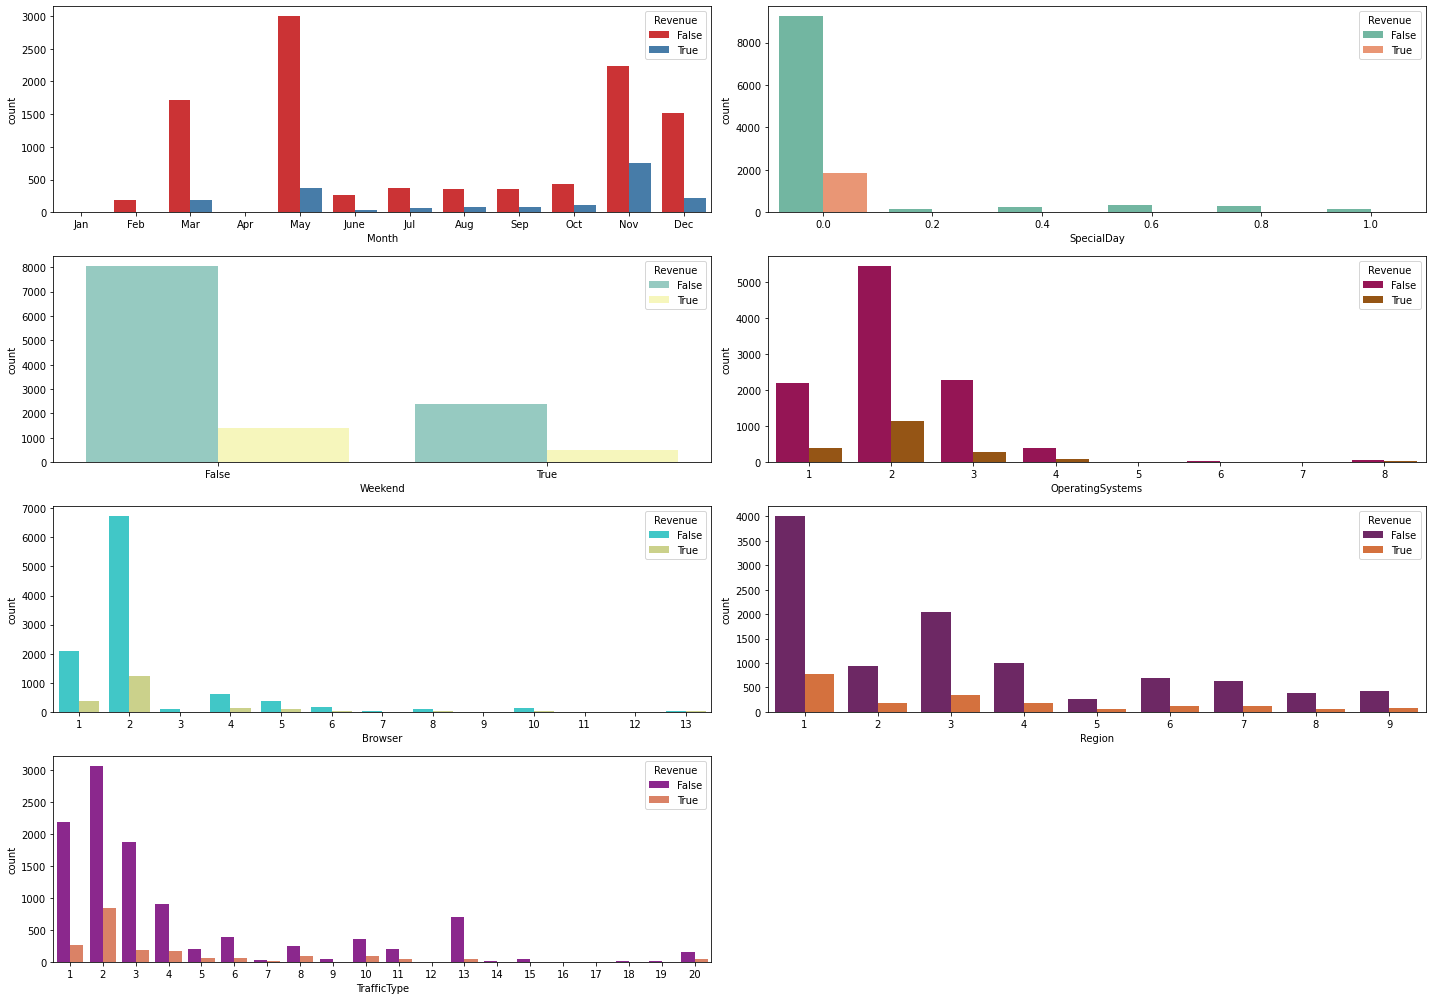

In [12]:
fig = plt.figure(figsize=(20, 14))

ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)


order = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df1, x='Month', hue='Revenue', ax=ax1, order=order, palette='Set1')
sns.countplot(data=df1, x='SpecialDay', hue='Revenue', ax=ax2, palette = 'Set2')
sns.countplot(data=df1, x='Weekend', hue='Revenue', ax=ax3, palette = 'Set3')
sns.countplot(data=df1, x='OperatingSystems', hue='Revenue', ax=ax4, palette = 'brg')
sns.countplot(data=df1, x='Browser', hue='Revenue', ax=ax5, palette = 'rainbow')
sns.countplot(data=df1, x='Region', hue='Revenue', ax=ax6, palette = 'inferno')
sns.countplot(data= df1, x='TrafficType', hue='Revenue', ax=ax7, palette = 'plasma')



plt.tight_layout()
plt.show()

<h4> Conclusion </h4>
<ol>
<li>March, May, November and December account for maximium revenue, mostly because of presence of special days.  </li>
<li>More than 90% users visit during special days which eventually leads to more conversion rates.</li>
<li> Revenue generated more on Weekday than Weekend.</li>
<li> Majority Revenue come from 1,2,3,4 OS. </li>
<li> 1,2,3,4 & 13 TrafficType generate majority of Revenue. </li>
</ol>

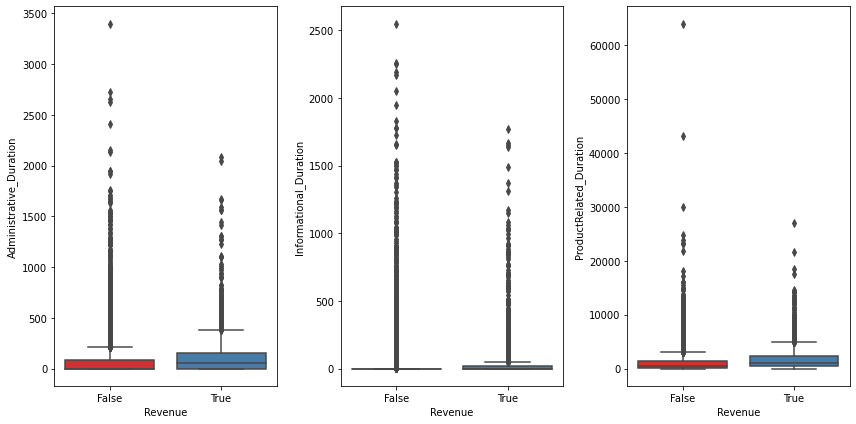

In [13]:
fig = plt.figure(figsize=(12, 6))

ax4 = fig.add_subplot(1, 3, 1)
ax5 = fig.add_subplot(1, 3, 2)
ax6 = fig.add_subplot(1, 3, 3)

sns.boxplot(data=df1, x = 'Revenue', y = 'Administrative_Duration', ax=ax4, palette='Set1')
sns.boxplot(data=df1, x = 'Revenue', y = 'Informational_Duration', ax=ax5, palette='Set1')
sns.boxplot(data=df1, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6, palette='Set1')

plt.tight_layout()
plt.show()

<h4> Conclusion </h4>
<ol>
<li>More Duration spent by user on pages tends to increase Revenue </li>
</ol>

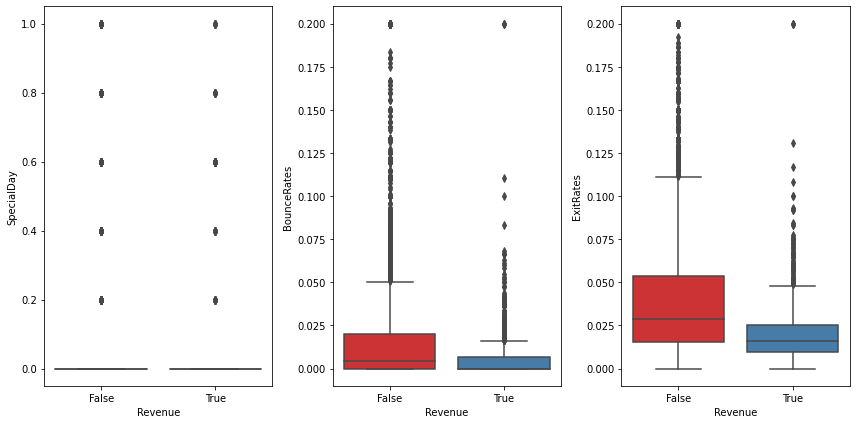

In [14]:
fig = plt.figure(figsize=(12, 6))

ax4 = fig.add_subplot(1, 3, 1)
ax5 = fig.add_subplot(1, 3, 2)
ax6 = fig.add_subplot(1, 3, 3)

sns.boxplot(data=df1, x = 'Revenue', y = 'SpecialDay', ax=ax4, palette='Set1')
sns.boxplot(data=df1, x = 'Revenue', y = 'BounceRates', ax=ax5, palette='Set1')
sns.boxplot(data=df1, x = 'Revenue', y = 'ExitRates', ax=ax6, palette='Set1')

plt.tight_layout()
plt.show()

<h4> Conclusion </h4>
<ol>
<li>Mostly Revenue is generated on Special days and in general people visit website on special days</li>
<li>Session with less BounceRates and ExitRates generate Revenue.</li>
</ol>

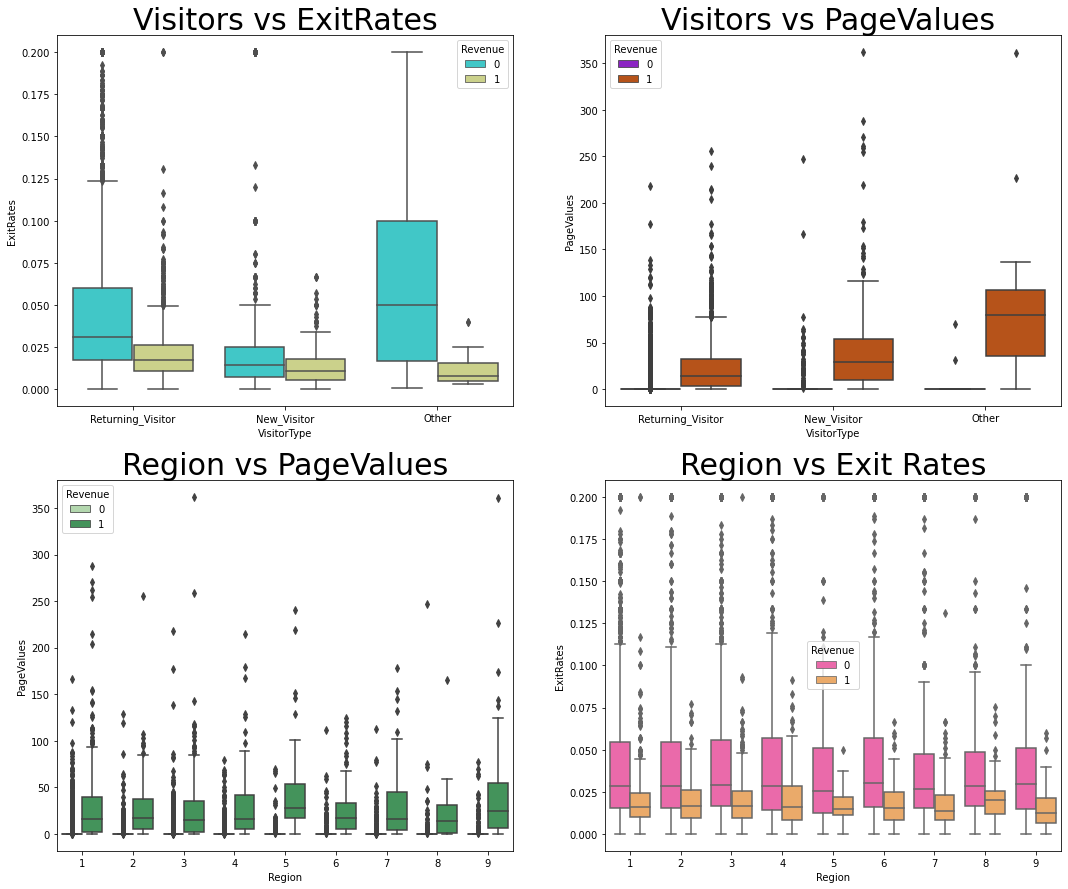

In [20]:
# visitor type vs exit rates 

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = df1['VisitorType'], y = df1['ExitRates'], hue = df1['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates', fontsize = 30)

# visitor type vs exit rates 
plt.subplot(2, 2, 2)
sns.boxplot(x = df1['VisitorType'], y = df1['PageValues'], hue = df1['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues ', fontsize = 30)

# region vs pagevalues 
plt.subplot(2, 2, 3)
sns.boxplot(x = df1['Region'], y = df1['PageValues'], hue = df1['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues', fontsize = 30)

#region vs exit rates
plt.subplot(2, 2, 4)
sns.boxplot(x = df1['Region'], y = df1['ExitRates'], hue = df1['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates', fontsize = 30)

plt.show()

<h4> Conclusion </h4>
<ol>
<li> less ExitRates -> More Revenue , Returning Visitor purchases more followed by New visitor </li>
<li> More PageVAlues -> More Revenue </li>
<li> Pages with 0 PageValues in all regions has nearly 0 Revenue</li>
</ol>

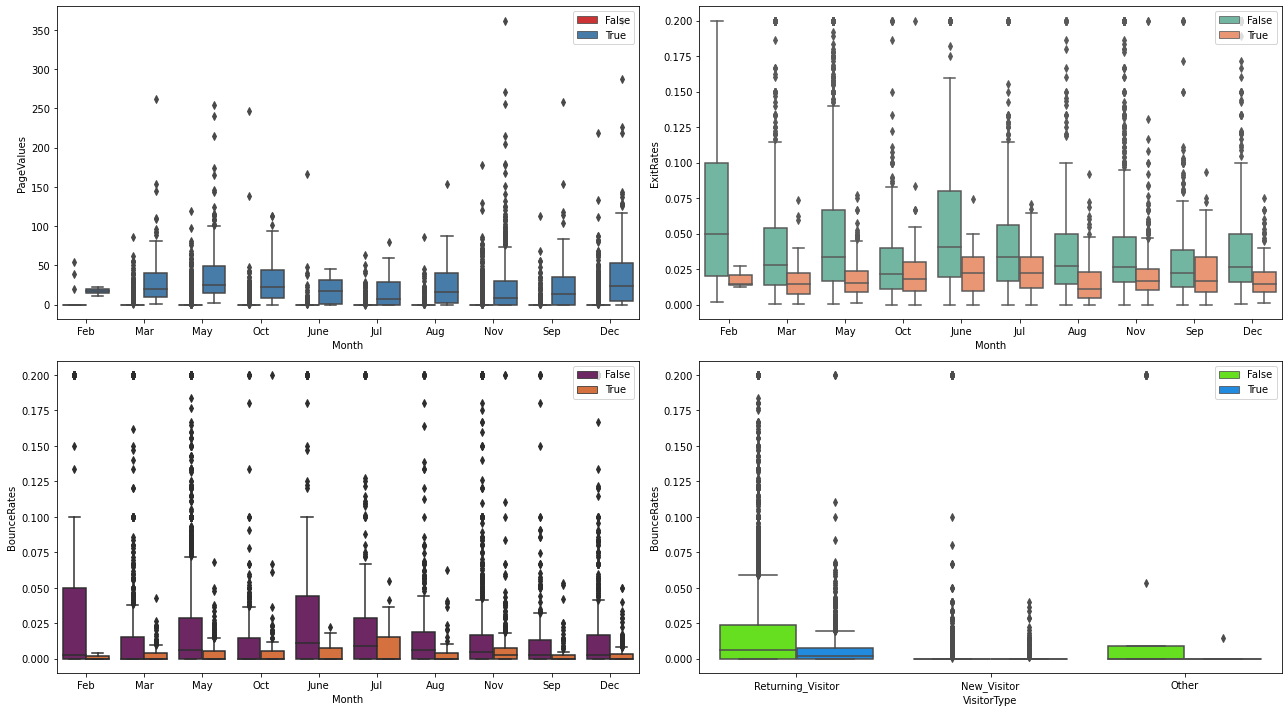

In [16]:
fig = plt.figure(figsize=(18, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.boxplot(x = df1['Month'], y = df1['PageValues'], hue = df1['Revenue'], palette = 'Set1', ax=ax1)
sns.boxplot(x = df1['Month'], y = df1['ExitRates'], hue = df1['Revenue'], palette = 'Set2', ax=ax2)
sns.boxplot(x = df1['Month'], y = df1['BounceRates'], hue = df1['Revenue'], palette = 'inferno', ax=ax3)
sns.boxplot(x = df1['VisitorType'], y = df1['BounceRates'], hue = df1['Revenue'], palette = 'gist_rainbow', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

<h4> Conclusion </h4>
<ol>
<li> Less BounceRates increase Revenue</li>
<li> Feb, June & July have high ExitRates </li>
</ol>

<h3>Multivariate Analysis</h3>

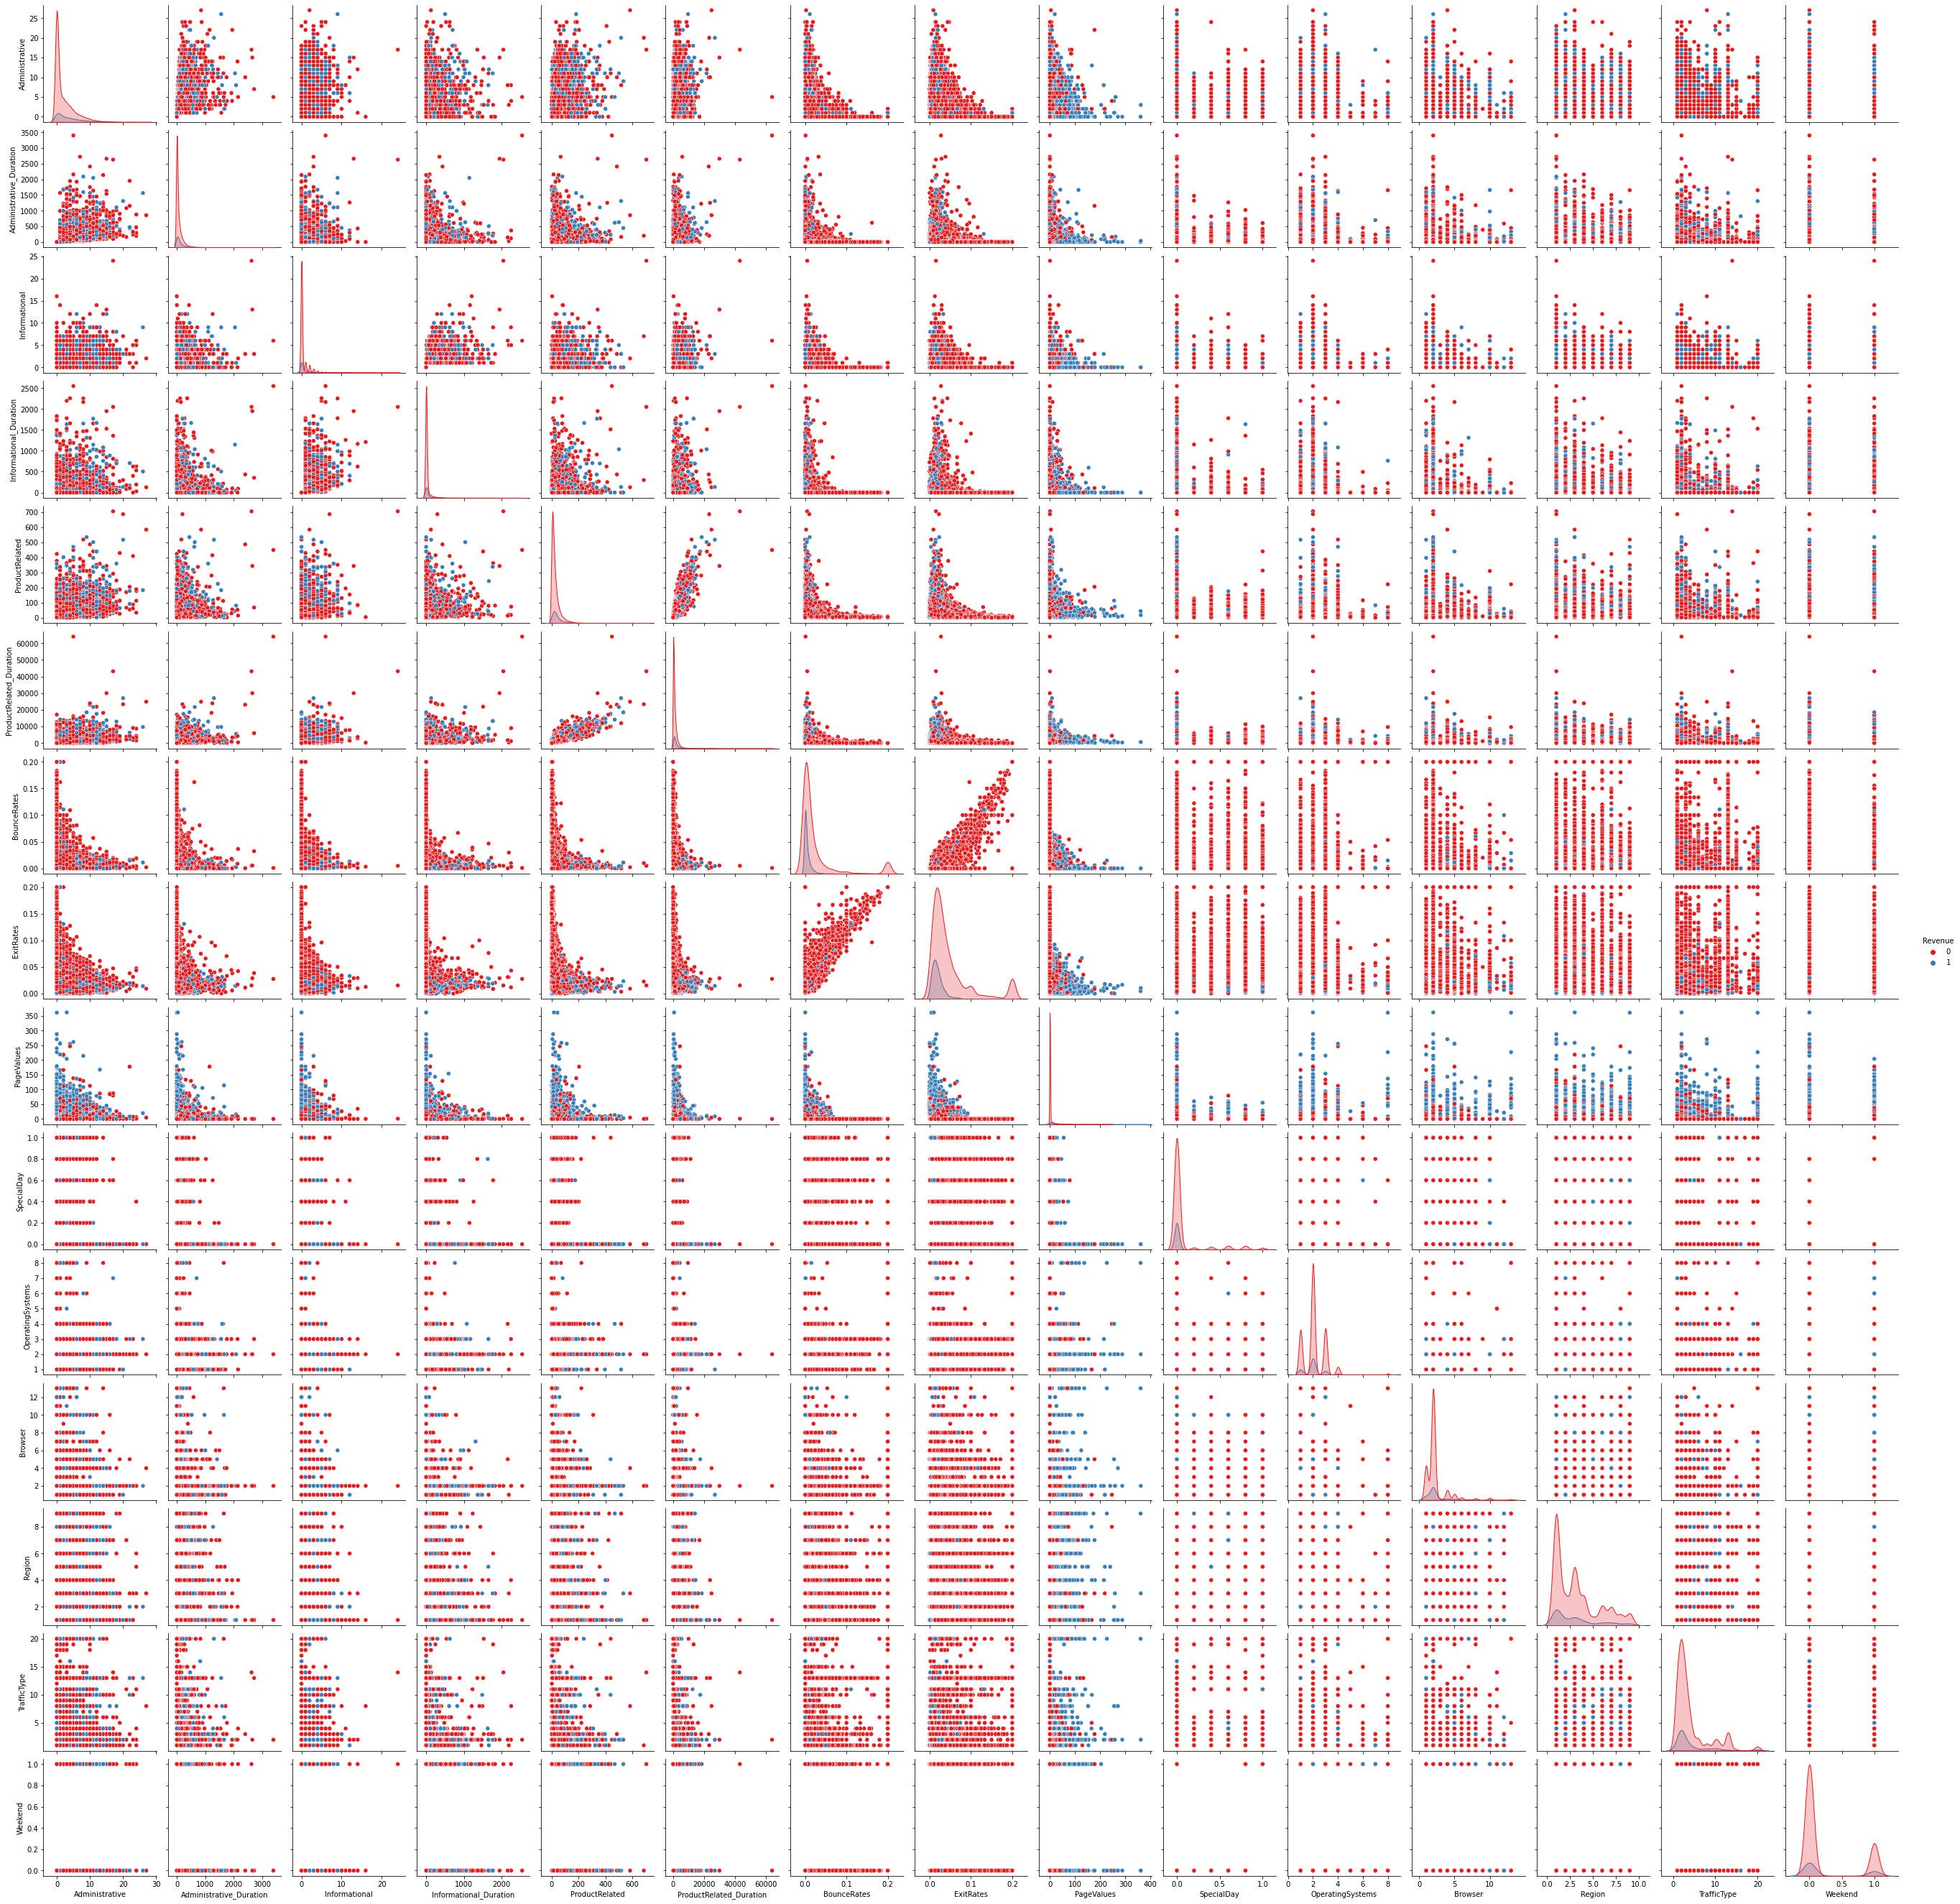

In [17]:
df5 = df1
df5.Revenue = df5.Revenue.astype('int')
df5.Weekend = df5.Weekend.astype('int')
sns.pairplot(data = df5, hue='Revenue', palette='Set1')

<h4>Conclusion</h4>
<ul>
<li>Some variable shows linear relations, and some distributions are Right-Skewed.</li>


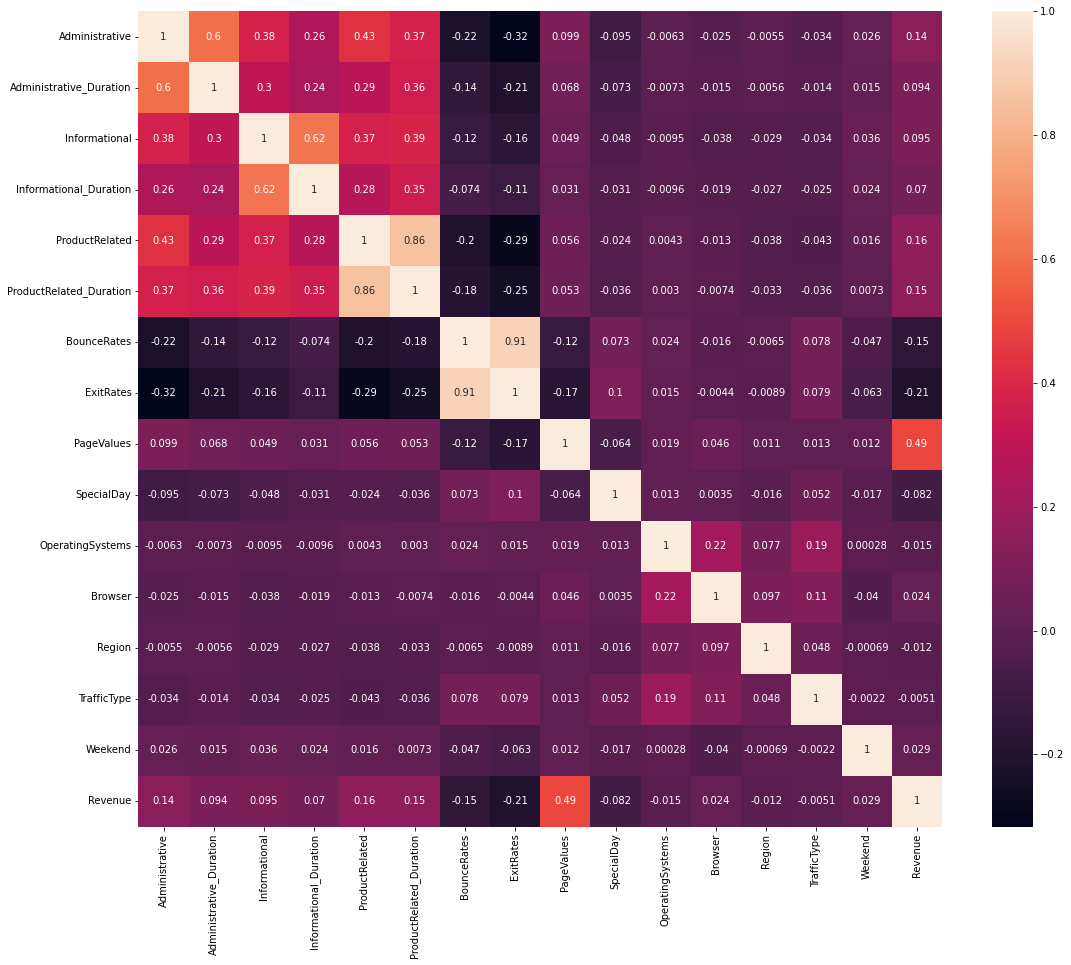

In [18]:
corelation_metrics = df1.corr()
sns.heatmap(corelation_metrics, annot=True)
plt.show()

<h4>Conclusion</h4>
<ul>
<li> The very few cases of high correlation (|corr| >= 0.7) are: 
    <ul> <li> BounceRates & ExitRates (0.9). </li>
    <li>ProductRelated & ProductRelated_Duration (0.9).</li></ul></li>
<li>Moderate Correlations (0.3 < |corr| < 0.7): 
    <ul> <li> Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.</li>
    <li>Also between PageValues and Revenue. </li></ul>
    </li>
<li>No strong correlation between Revenue (our target) and any other feature. </li>
<li>A strong negative correlation between PageValues and other features shown. </li>
    
</ul>
